In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"processing/arenson/RES20-TUK05-01 schlum-topo.dat")
data

21/05/24 - 13:48:36 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 60 data: 1008, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

21/05/24 - 13:48:38 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
21/05/24 - 13:48:43 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 13:48:43 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3119793705467662385
21/05/24 - 13:48:43 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 13:48:43 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5605582577138214507


1008 [16.782771991691224,...,16.810502217475467]

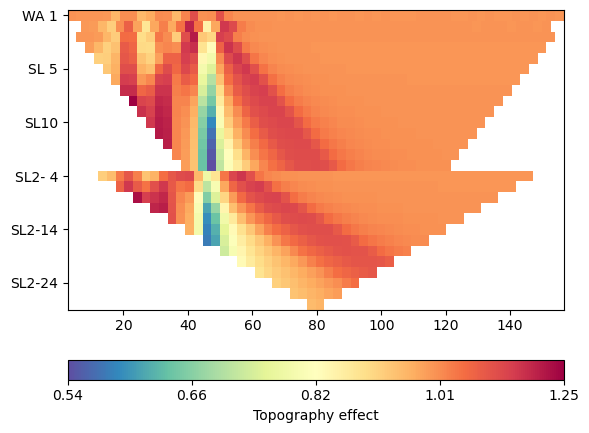

In [4]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e211ea6910>)

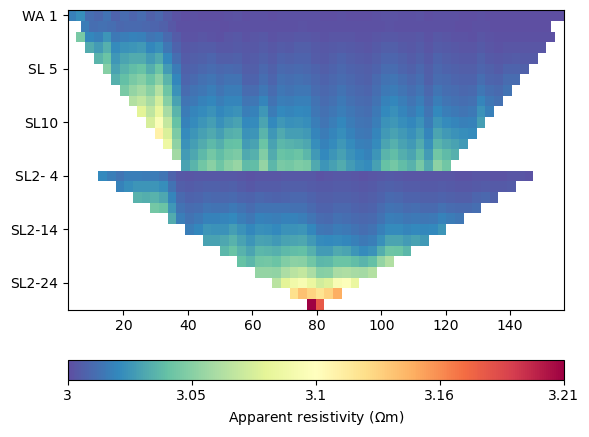

In [5]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e211f79a90>)

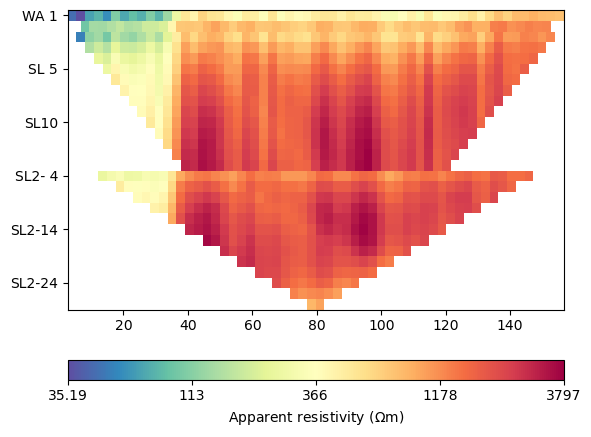

In [6]:
ert.showData(data)

21/05/24 - 13:48:58 - pyGIMLi - INFO - Found 2 regions.
21/05/24 - 13:48:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/05/24 - 13:48:58 - pyGIMLi - INFO - Found 2 regions.
21/05/24 - 13:48:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/05/24 - 13:48:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/05/24 - 13:48:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/05/24 - 13:48:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3136 Cells: 5836 Boundaries: 4594
21/05/24 - 13:48:58 - pyGIMLi - INFO - Use median(data values)=1597.728
21/05/24 - 13:48:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1184, min/max=1597.728000/1597.728000
21/05/24 - 13:48:58 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001E23FACFC90>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001E27BE88770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001E27BE88270>
min/max (data): 35.19/3797
min/max (error): 3%/3.21%
min/max (start model): 1598/1598
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  691.27
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   93.06 (dPhi = 86.26%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   16.55 (dPhi = 79.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    7.36 (dPhi = 43.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.69 (dPhi = 33.87%) lam: 20.0
------------

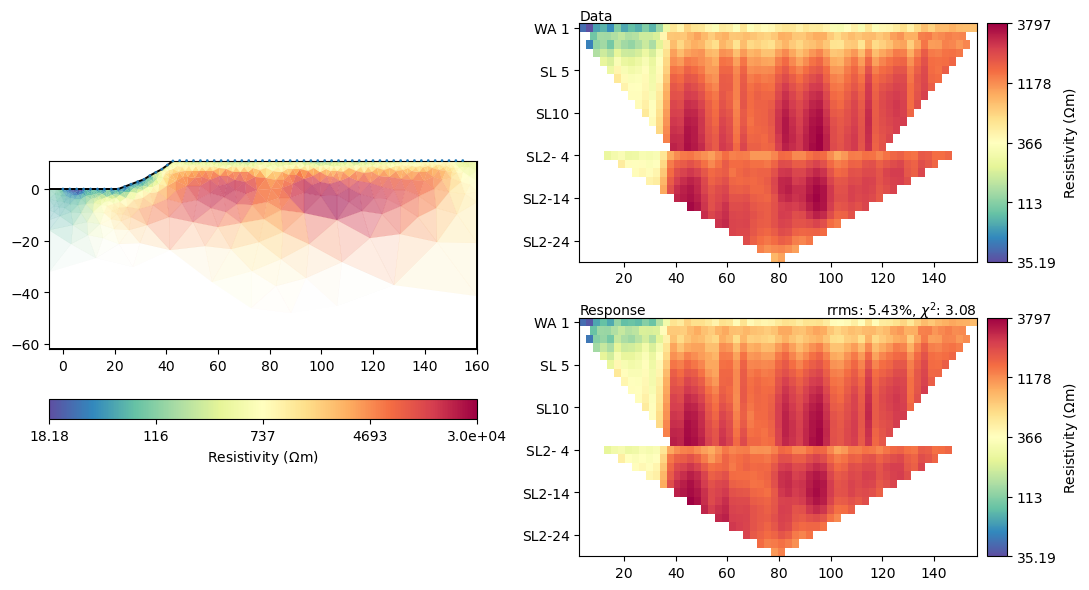

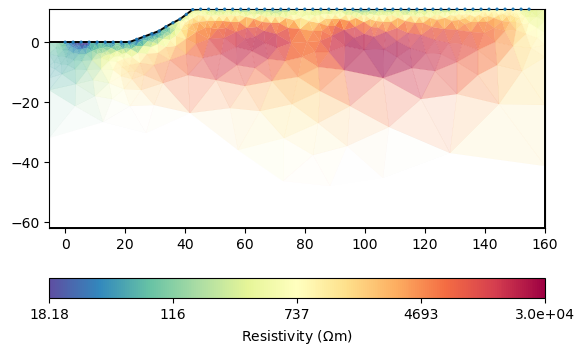

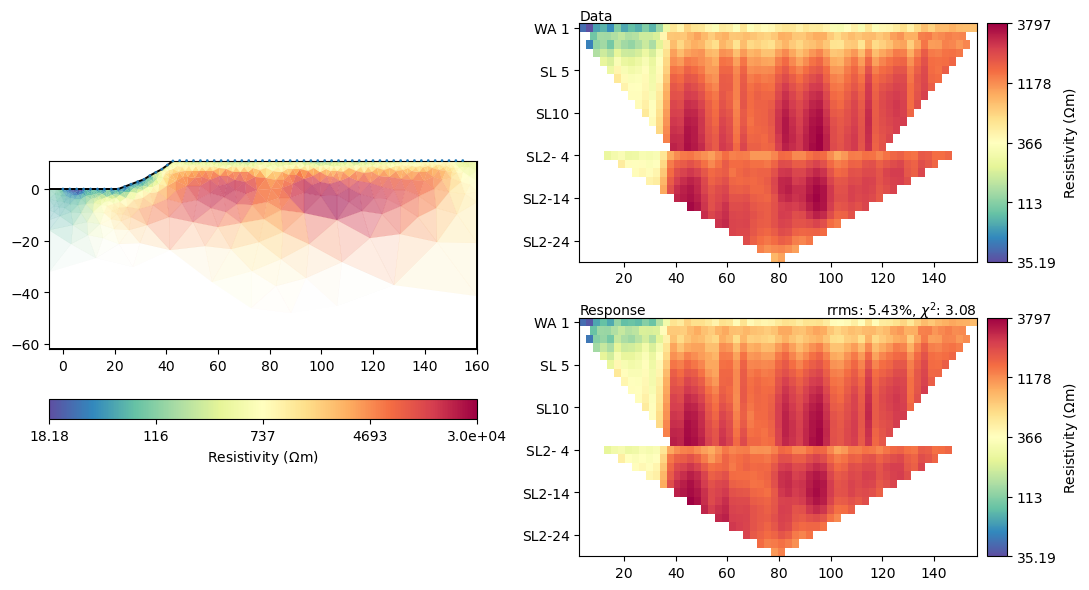

In [7]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

21/05/24 - 13:53:26 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

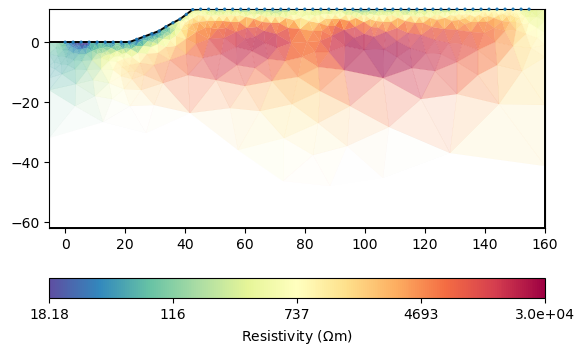

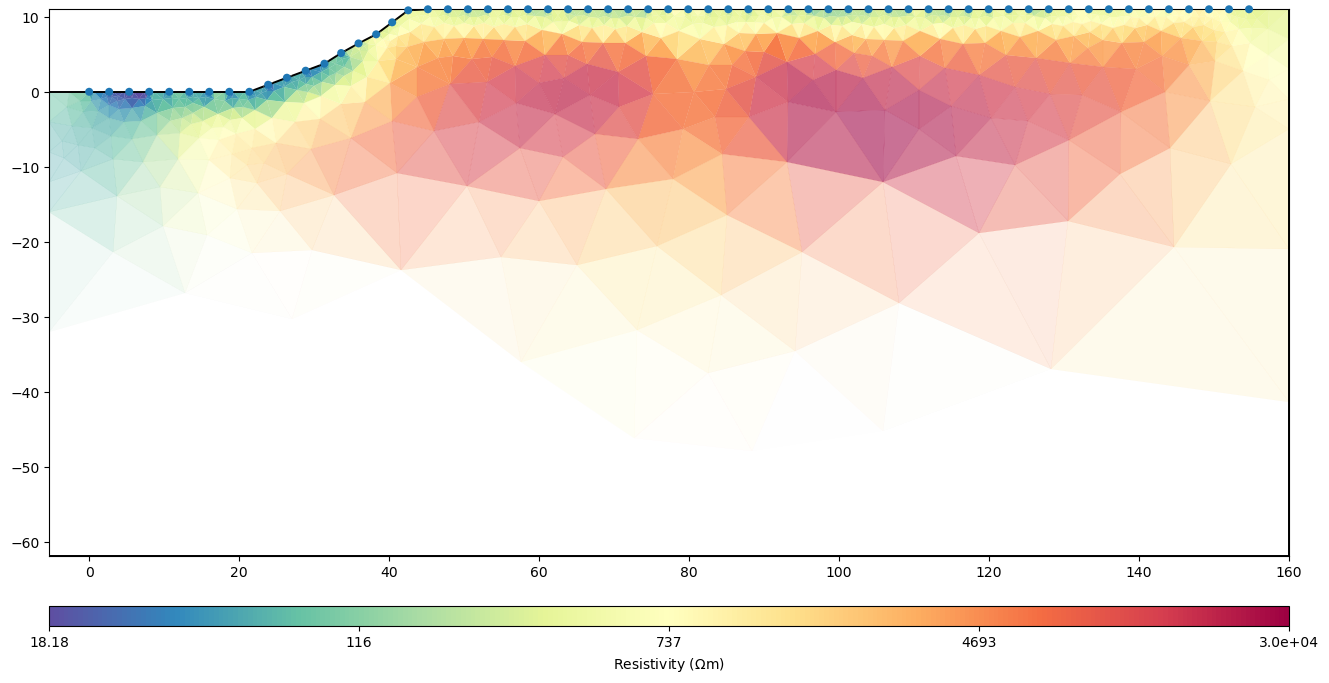

In [8]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions')